In [1]:
import numpy as np
import pandas as pd
import os
from os import listdir
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objs as go
from sklearn.linear_model import LinearRegression
from math import log,sqrt
from sklearn.preprocessing import FunctionTransformer

In [2]:
fiscal_data = "/home/quazar07/Desktop/InfoViz/Assg_3/Sdf16_1a.txt"
lea_data = "/home/quazar07/Desktop/InfoViz/Assg_3/math-achievement-lea-sy2015-16.csv"

In [3]:
df_fiscal_data = pd.read_csv(fiscal_data,sep='\t')
df_lea_data = pd.read_csv(lea_data)

/home/quazar07/.local/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2718: DtypeWarning:

Columns (0,3) have mixed types. Specify dtype option on import or set low_memory=False.

/home/quazar07/.local/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2718: DtypeWarning:

Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.



In [4]:
df_fiscal_data.head()

,LEAID,CENSUSID,FIPST,CONUM,CSA,CBSA,NAME,STNAME,STABBR,SCHLEV,...,FL_61V,FL_66V,FL_W01,FL_W31,FL_W61,FL_V95,FL_V02,FL_K14,FL_CE1,FL_CE2
0,100002,N,1,01073,142,13820,Alabama Youth Services,Alabama,AL,N,...,M,M,M,M,M,M,M,M,M,M
1,100005,01504840100000,1,01095,290,10700,Albertville City,Alabama,AL,03,...,M,M,R,R,R,M,M,M,M,M
2,100006,01504800100000,1,01095,290,10700,Marshall County,Alabama,AL,03,...,M,M,R,R,R,M,M,M,M,M
3,100007,01503740100000,1,01073,142,13820,Hoover City,Alabama,AL,03,...,M,M,R,R,R,M,M,M,M,M
4,100008,01504530100000,1,01089,290,26620,Madison City,Alabama,AL,03,...,M,M,R,R,R,M,M,M,M,M


In [5]:
grouped_df_fiscal_data = df_fiscal_data.groupby(['STABBR'])['TFEDREV'].sum().reset_index(name ='Total Revenue').sort_values('Total Revenue').nlargest(10,'Total Revenue')
grouped_df_fiscal_data

,STABBR,Total Revenue
4,CA,7709274795
43,TX,6194316950
34,NY,3374793578
9,FL,3147328988
14,IL,2334944853
38,PA,2037314939
35,OH,1837962930
10,GA,1815241986
22,MI,1731033937
27,NC,1587975932


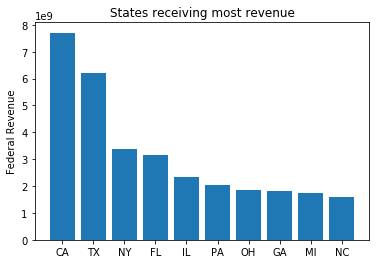

In [6]:
Y = grouped_df_fiscal_data.iloc[:,1].values
X = np.arange(len(Y))
plt.bar(X,Y)
plt.xticks(X, grouped_df_fiscal_data.iloc[:,0].values)
plt.ylabel('Federal Revenue')
plt.title('States receiving most revenue')
plt.show()

In [7]:
df_fiscal_data = pd.read_csv(fiscal_data,sep='\t')
df_fiscal_data['V33'] = np.where(df_fiscal_data['V33'] <= 0, 0,df_fiscal_data['V33'])
grouped_df_fiscal_data = df_fiscal_data.groupby(['STABBR'])['TFEDREV','V33'].sum().reset_index()
# .reset_index(name ='Total Revenue').sort_values('Total Revenue').nlargest(10,'Total Revenue')
# print(grouped_df_fiscal_data)
grouped_df_fiscal_data.loc[:, 'V33'] = grouped_df_fiscal_data.loc[:, 'TFEDREV'].div(grouped_df_fiscal_data['V33'], axis=0)
top_avg = grouped_df_fiscal_data.sort_values('V33').nlargest(10,'V33')

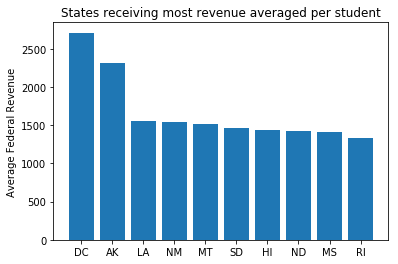

In [8]:
Y = top_avg.iloc[:,2].values
X = np.arange(len(Y))
plt.bar(X,Y)
plt.xticks(X, top_avg.iloc[:,0].values)
plt.ylabel('Average Federal Revenue')
plt.title('States receiving most revenue averaged per student')
plt.show()

In [9]:
#QUESTION 2

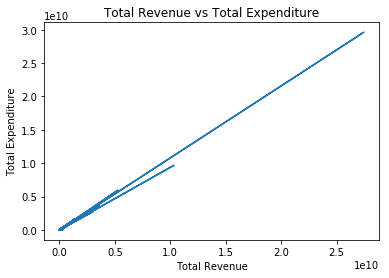

In [10]:
plt.plot(df_fiscal_data['TOTALREV'], df_fiscal_data['TOTALEXP'])
plt.ylabel('Total Expenditure')
plt.xlabel('Total Revenue')
plt.title('Total Revenue vs Total Expenditure')
plt.show()

In [11]:
df_fiscal_data = pd.read_csv(fiscal_data,sep='\t')
grouped_df_fiscal_data = df_fiscal_data.groupby(['STABBR'])['TOTALREV','TOTALEXP','V33'].sum().reset_index()
grouped_df_fiscal_data['DEBT_AVG'] = np.subtract(grouped_df_fiscal_data['TOTALEXP'],grouped_df_fiscal_data['TOTALREV'])/grouped_df_fiscal_data['V33']
top_avg = grouped_df_fiscal_data.sort_values('DEBT_AVG').nlargest(10,'DEBT_AVG')

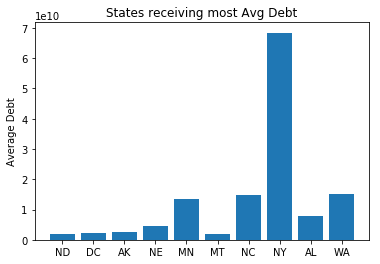

In [12]:
Y = top_avg.iloc[:,2].values
X = np.arange(len(Y))
plt.bar(X,Y)
plt.xticks(X, top_avg.iloc[:,0].values)
plt.ylabel('Average Debt')
plt.title('States receiving most Avg Debt')
plt.show()

In [13]:
#QUESTION 3

In [14]:
df_lea_data.head()

,STNAM,FIPST,LEAID,LEANM,DATE_CUR,ALL_MTH00NUMVALID_1516,ALL_MTH00PCTPROF_1516,MAM_MTH00NUMVALID_1516,MAM_MTH00PCTPROF_1516,MAS_MTH00NUMVALID_1516,...,MIG_MTH05NUMVALID_1516,MIG_MTH05PCTPROF_1516,MIG_MTH06NUMVALID_1516,MIG_MTH06PCTPROF_1516,MIG_MTH07NUMVALID_1516,MIG_MTH07PCTPROF_1516,MIG_MTH08NUMVALID_1516,MIG_MTH08PCTPROF_1516,MIG_MTHHSNUMVALID_1516,MIG_MTHHSPCTPROF_1516
0,ALABAMA,1,100005,Albertville City,14APR17,2638,42,5,PS,12,...,28,LE20,16,LE20,19,21-39,20,LE20,8,LT50
1,ALABAMA,1,100006,Marshall County,14APR17,3003,39,16,21-39,13,...,6,LT50,4,PS,4,PS,4,PS,2,PS
2,ALABAMA,1,100007,Hoover City,14APR17,7356,66,8,GE50,515,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ALABAMA,1,100008,Madison City,14APR17,5482,72,30,60-79,501,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ALABAMA,1,100011,Leeds City,14APR17,1024,37,1,PS,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
df_lea_data['ALL_MTH00PCTPROF_1516'].unique()

array(['42', '39', '66', '72', '37', '43', '69', '21', '62', '47', '34',
       '60', '23', '54', '48', '46', '50', '11', '19', '35', '51', '13',
       '26', '32', '22', '27', '41', '49', '44', '31', '38', '67', '53',
       '33', '20', '36', '14', '63', '40', '56', '45', '52', '10', '17',
       '29', '28', '87', '59', '58', '78', '10-14', '30', '25-29', '30-34',
       '60-64', '30-39', '61', '45-49', '68', '35-39', '11-19', 'LT50',
       'PS', '65-69', '80-89', '85-89', '55-59', 'LE10', '55', '2',
       '15-19', '40-44', '50-54', 'LE20', '16', 'LE5', '20-29', '21-39',
       '70-74', '15', 'GE90', '86', '76', '40-49', '24', '75-79', '74',
       '25', '50-59', '70-79', '6-9', '85', '7', '40-59', '60-79', '80-84',
       '20-24', '71', '65', '8', '64', '82', 'GE50', '80', '70', '77',
       '88', '83', '93', '81', '57', '75', '84', '92', '73', 'GE95', '18',
       '12', '6', '9', '3', '90', 'LE1', '4', 'GE80', '5', '60-69', '79',
       '89', '98', '91', '95', '90-94', '94', 'GE99

In [16]:
def customFunction(df,col):
    unique_vals = df[col].unique()
    special = {'GE','LE','LT'}
    all_nums_mean = np.mean([int(val) for val in df[col].values if val.isdigit()])
    for each_val in unique_vals:
        if(each_val.isdigit()):
            df.loc[df[col] == each_val, col] = float(each_val)
        if('-' in each_val):
            df.loc[df[col] == each_val, col] = float(np.mean([int(val) for val in each_val.split('-')]))
        elif('PS' in each_val):
            df.loc[df[col] == each_val, col] = all_nums_mean
        for each_spec in special:
            if(each_spec in each_val):
                df.loc[df[col] == each_val, col] = float(each_val.split(each_spec)[1])
                

In [17]:
df_lea_data = pd.read_csv(lea_data)
customFunction(df_lea_data,'ALL_MTH00PCTPROF_1516')

In [18]:
# print([type(each) for each in df_lea_data['ALL_MTH00PCTPROF_1516'].unique()])
df_lea_data['ALL_MTH00PCTPROF_1516'].unique()

array([42.0, 39.0, 66.0, 72.0, 37.0, 43.0, 69.0, 21.0, 62.0, 47.0, 34.0,
       60.0, 23.0, 54.0, 48.0, 46.0, 50.0, 11.0, 19.0, 35.0, 51.0, 13.0,
       26.0, 32.0, 22.0, 27.0, 41.0, 49.0, 44.0, 31.0, 38.0, 67.0, 53.0,
       33.0, 20.0, 36.0, 14.0, 63.0, 40.0, 56.0, 45.0, 52.0, 10.0, 17.0,
       29.0, 28.0, 87.0, 59.0, 58.0, 78.0, 12.0, 30.0, 34.5, 61.0, 68.0,
       15.0, 48.53378619949947, 84.5, 57.0, 55.0, 2.0, 16.0, 5.0, 24.5,
       90.0, 86.0, 76.0, 44.5, 24.0, 77.0, 74.0, 25.0, 54.5, 74.5, 7.5,
       85.0, 7.0, 49.5, 69.5, 82.0, 71.0, 65.0, 8.0, 64.0, 80.0, 70.0,
       88.0, 83.0, 93.0, 81.0, 75.0, 84.0, 92.0, 73.0, 95.0, 18.0, 6.0,
       9.0, 3.0, 1.0, 4.0, 64.5, 79.0, 89.0, 98.0, 91.0, 94.0, 99.0, 96.0,
       97.0], dtype=object)

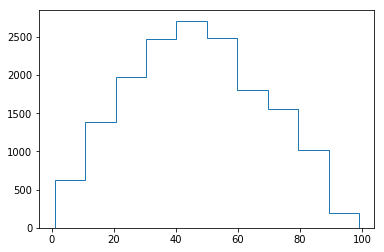

In [19]:
plt.hist(np.float64(df_lea_data['ALL_MTH00PCTPROF_1516']), bins=10,histtype='step')
plt.show()

In [20]:
#QUESTION 4


In [21]:
df_fiscal_data = pd.read_csv(fiscal_data,sep='\t')
print("Budget cut value :")
print(df_fiscal_data['TFEDREV'].sum()*0.15)

Budget cut value :
8340410870.7


In [22]:
budgetCut = df_fiscal_data['TFEDREV'].sum()*0.15
df_fiscal_data['UnspentBudget'] = df_fiscal_data['TOTALREV'] - df_fiscal_data['TOTALEXP']
df_fiscal_data = df_fiscal_data.sort_values('UnspentBudget',ascending=False)

col_leaid = []
col_cut = []
for x,row in df_fiscal_data.iterrows(): 
    if(budgetCut<=0):
        break
    else:
        col_leaid.append(row['LEAID'])
        col_cut.append(row['TFEDREV'])
        budgetCut-= int(row['TFEDREV'])

In [23]:
for i,val in zip(col_leaid,col_cut):
    print("LEAID: "+str(i)+" CUT: "+str(val))

LEAID: 622710 CUT: 1091400000
LEAID: 2680995 CUT: 73019000
LEAID: 1500030 CUT: 261131000
LEAID: 4218990 CUT: 271369000
LEAID: 2400480 CUT: 112717000
LEAID: 0900700 CUT: 4205000
LEAID: 2680880 CUT: 50172000
LEAID: 2680620 CUT: 31237000
LEAID: 3200060 CUT: 277628000
LEAID: 1201440 CUT: 219981000
LEAID: 2201170 CUT: 102276000
LEAID: 5100840 CUT: 33520000
LEAID: 4835100 CUT: 31851000
LEAID: 4503901 CUT: 16019000
LEAID: 0638010 CUT: 54822000
LEAID: 2680720 CUT: 41659000
LEAID: 2012990 CUT: 73972000
LEAID: 1201500 CUT: 187376000
LEAID: 4502310 CUT: 72818000
LEAID: 2680990 CUT: 16082000
LEAID: 2400510 CUT: 145009000
LEAID: 1302550 CUT: 142728000
LEAID: 0635310 CUT: 83062000
LEAID: 1301740 CUT: 121738000
LEAID: 4800211 CUT: 45249000
LEAID: 3605850 CUT: 127470000
LEAID: 0634320 CUT: 151427000
LEAID: 601332 CUT: 41474000
LEAID: 1201920 CUT: 66211000
LEAID: 4827300 CUT: 32773000
LEAID: 2680900 CUT: 11916000
LEAID: 2400120 CUT: 102256000
LEAID: 0804800 CUT: 50952000
LEAID: 608460 CUT: 17940000
LEA

#QUESTION 5
My reasoning is to cut extra funding where expenditure is less than revenue received